In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
zomato = pd.read_excel('/Users/abhi/Desktop/MSU/8. Coursework/3. Fall Semester/ITM881_Network Analytics/03_Project/Zomato_filtered.xlsx')
swiggy = pd.read_excel('/Users/abhi/Desktop/MSU/8. Coursework/3. Fall Semester/ITM881_Network Analytics/03_Project/Swiggy_filtered.xlsx')

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

### EDA

In [ ]:
zomato.head()

,App,review_date,review_description,rating,thumbsUpCount,developer_response,developer_response_date,appVersion
0,Zomato,2023-05-07 15:42:17,"A few months ago, the app worked flawlessly. U...",1,337,NaN,NaT,17.4.6
1,Zomato,2023-05-12 17:51:32,Great delivery app. But off lately there have ...,2,223,NaN,NaT,17.4.8
2,Zomato,2023-06-17 14:23:16,Your app and delivery everything is good. But ...,3,525,NaN,NaT,17.5.3
3,Zomato,2023-06-16 07:19:44,Poor cust. Experience. I ordered items from a ...,2,396,"Hi Priya, glad to hear that! Thank you for you...",2022-06-16 10:59:51,17.5.3
4,Zomato,2023-06-04 18:23:12,Zomato seems to have lost it recently. Have be...,1,296,NaN,NaT,17.5.1


In [ ]:
zomato.shape

(87969, 8)

In [ ]:
swiggy.head()

,App,review_date,review_description,rating,thumbsUpCount,developer_response,developer_response_date,appVersion
0,Swiggy,2023-06-16 19:50:16,Swiggy clearly has to be one of the worst apps...,1,579,"Hi there, we are sorry for any hassle you have...",2023-06-16 19:53:53,4.34.0
1,Swiggy,2023-05-17 16:10:43,The delivery time for each order has been ridi...,1,189,"Hi, please write to us about your experience a...",2023-05-17 16:12:00,4.32.2
2,Swiggy,2023-05-15 07:16:17,used to be great. now it seems like they fired...,1,127,This shouldn't have happened. Kindly help us w...,2023-05-15 07:21:56,4.32.2
3,Swiggy,2023-05-26 14:42:22,Extremely horrible experience since the last f...,1,663,"Hey there, we are sorry for the unpleasant exp...",2023-05-26 14:53:33,4.33.1
4,Swiggy,2023-05-14 15:59:44,Swiggy doesn't compensate for your loss. One o...,1,105,"Hi, we are sorry about the below-par experienc...",2023-05-14 16:01:56,4.32.2


In [ ]:
swiggy.shape

(67978, 8)

In [ ]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87969 entries, 0 to 87968
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   App                      87969 non-null  object        
 1   review_date              87969 non-null  datetime64[ns]
 2   review_description       87968 non-null  object        
 3   rating                   87969 non-null  int64         
 4   thumbsUpCount            87969 non-null  int64         
 5   developer_response       61611 non-null  object        
 6   developer_response_date  61611 non-null  datetime64[ns]
 7   appVersion               77339 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 5.4+ MB


In [ ]:
zomato.isnull().sum()

App                            0
review_date                    0
review_description             1
rating                         0
thumbsUpCount                  0
developer_response         26358
developer_response_date    26358
appVersion                 10630
dtype: int64

In [ ]:
zomato.describe()

,rating,thumbsUpCount
count,87969.000000,87969.000000
mean,2.893235,2.171106
std,1.836707,58.623406
min,1.000000,0.000000
25%,1.000000,0.000000
50%,3.000000,0.000000
75%,5.000000,0.000000
max,5.000000,10176.000000


In [ ]:
zomato['rating'].value_counts()

1    39244
5    32037
4     8830
3     4050
2     3808
Name: rating, dtype: int64

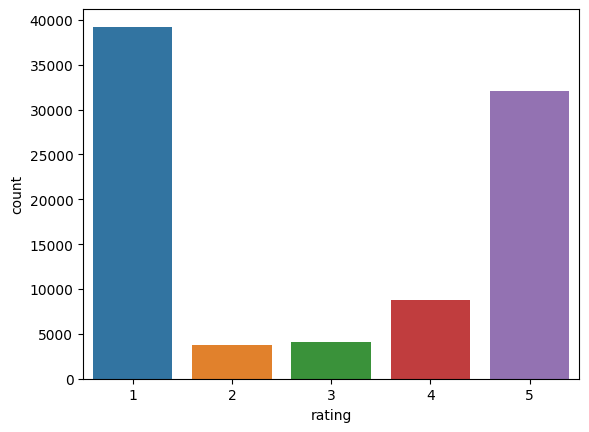

In [ ]:
sns.countplot(x=zomato['rating'])
plt.show()

In [ ]:
average_rating_zomato = zomato['rating'].mean()
print("Average Rating of Zomato:", average_rating_zomato)

Average Rating of Zomato: 2.8932351169161863


In [ ]:
swiggy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67978 entries, 0 to 67977
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   App                      67978 non-null  object        
 1   review_date              67978 non-null  datetime64[ns]
 2   review_description       67978 non-null  object        
 3   rating                   67978 non-null  int64         
 4   thumbsUpCount            67978 non-null  int64         
 5   developer_response       67664 non-null  object        
 6   developer_response_date  67664 non-null  datetime64[ns]
 7   appVersion               57164 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 4.1+ MB


In [ ]:
swiggy.isnull().sum()

App                            0
review_date                    0
review_description             0
rating                         0
thumbsUpCount                  0
developer_response           314
developer_response_date      314
appVersion                 10814
dtype: int64

In [ ]:
swiggy.describe()

,rating,thumbsUpCount
count,67978.000000,67978.000000
mean,2.275354,3.062756
std,1.735423,78.855557
min,1.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,4.000000,0.000000
max,5.000000,10628.000000


In [ ]:
swiggy['rating'].value_counts()

1    41601
5    16733
4     3781
2     3305
3     2558
Name: rating, dtype: int64

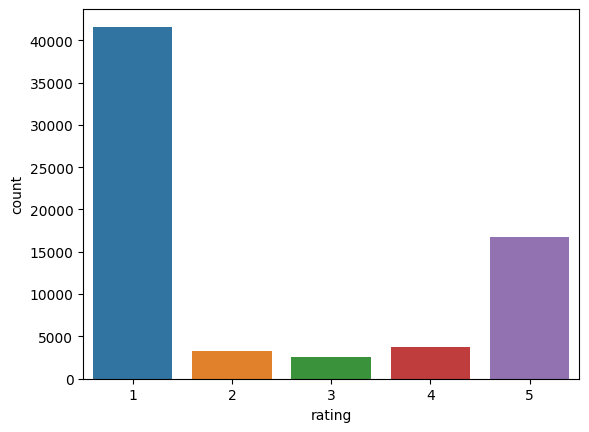

In [ ]:
sns.countplot(x=swiggy['rating'])
plt.show()

In [ ]:
average_rating_swiggy = swiggy['rating'].mean()
print("Average Rating of Swiggy:", average_rating_swiggy)

Average Rating of Swiggy: 2.2753537909323605


### TEXT PREPROCESSING

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.snowball import SnowballStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix, hamming_loss
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MultiLabelBinarizer
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import MultinomialNB
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset

ModuleNotFoundError: ignored

In [ ]:
import nltk

# Download the stopwords corpus
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Remove Stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

#Clean Text
def clean_text(text):
    text = text.lower()
    text = re.sub("[^a-zA-Z]"," ",text)
    #text = re.sub(r'\s+', ' ', text)
    text = text.split()
    text = [t.strip() for t in text]
    text = ' '.join(text)
    return text

#stemming
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

In [ ]:
zomato['review_description']

0        A few months ago, the app worked flawlessly. U...
1        Great delivery app. But off lately there have ...
2        Your app and delivery everything is good. But ...
3        Poor cust. Experience. I ordered items from a ...
4        Zomato seems to have lost it recently. Have be...
                               ...                        
87964                     Very fast dilevery very good app
87965    Good food with discounted from famous restaura...
87966                 Your delivery is so fast . I like it
87967                   Nice service&cashback is very good
87968                                        Gold is Gold!
Name: review_description, Length: 87969, dtype: object

In [ ]:
# Added this on 10/03
zomato['review_description'] = zomato['review_description'].astype(str)
zomato['review_description']= zomato['review_description'].apply(lambda x: remove_stopwords(x))
zomato['review_description'] = zomato['review_description'].apply(lambda x:clean_text(x))
zomato['review_description'] = zomato['review_description'].apply(stemming)

swiggy['review_description'] = swiggy['review_description'].astype(str)
swiggy['review_description']= swiggy['review_description'].apply(lambda x: remove_stopwords(x))
swiggy['review_description'] = swiggy['review_description'].apply(lambda x:clean_text(x))
swiggy['review_description'] = swiggy['review_description'].apply(stemming)

In [ ]:
all_words_zomato = " ".join(str(words) for words in zomato['review_description'] )

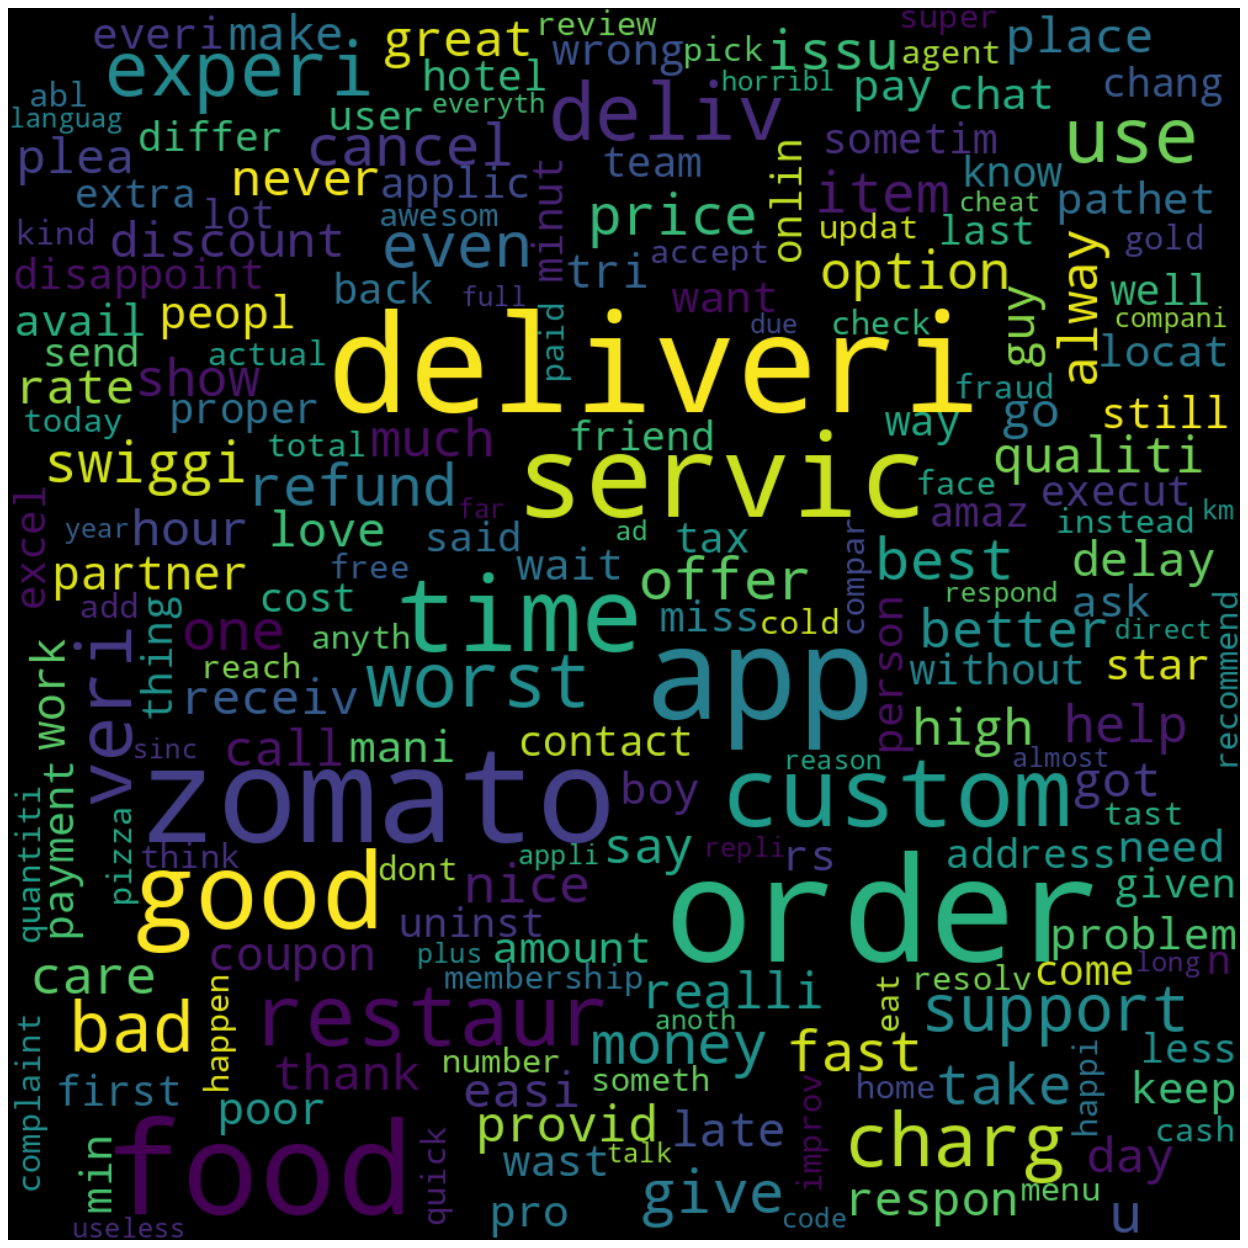

In [ ]:
wordcloud_zomato = WordCloud(width = 1000,
                      height = 1000, collocations=False, random_state = 21,
                      max_font_size= 119).generate(all_words_zomato)
plt.figure(figsize = (20,20), dpi= 80)
plt.imshow(wordcloud_zomato, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
all_words_swiggy = " ".join(str(words) for words in swiggy['review_description'] if isinstance(words, str))

In [ ]:
swiggy['review_description']

0        swiggi clear one worst app ever me alway unrel...
1        the deliveri time order ridicul high i underst...
2        use great seem like fire entir support staff s...
3        extrem horribl experi sinc last month they say...
4        swiggi compens loss one instanc i paid rs item...
                               ...                        
67973                                     veri nice servic
67974          hate high deliveri charg low custom support
67975                             good servic thank swiggi
67976                               good app nice deliveri
67977                 worst app well uneduc custom support
Name: review_description, Length: 67978, dtype: object

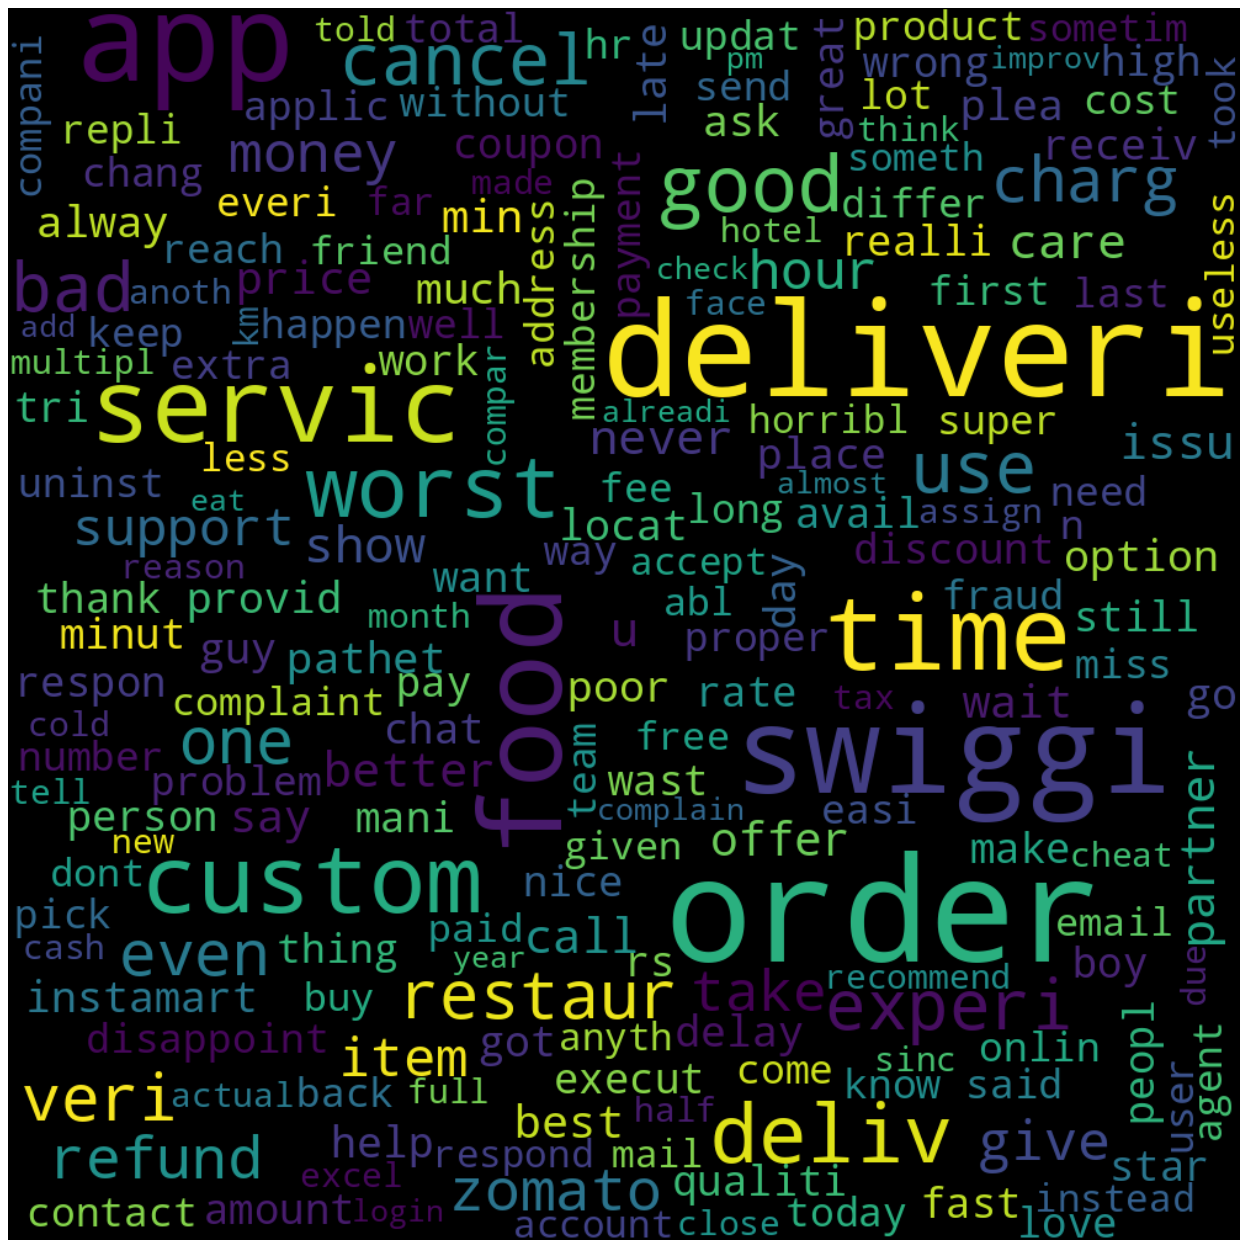

In [ ]:
wordcloud_swiggy = WordCloud(width = 1000,
                      height = 1000,
                      random_state = 21,
                      max_font_size= 119, collocations=False).generate(all_words)
plt.figure(figsize = (20,20), dpi= 80)
plt.imshow(wordcloud_swiggy, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
def categorize_sentiment(score):
    if score < 3:
        return "Negative"
    elif score == 3:
        return "Neutral"
    else:
        return "Positive"

In [ ]:
zomato['sentiment'] = zomato['rating'].apply(categorize_sentiment)
zomato.head()

,App,review_date,review_description,rating,thumbsUpCount,developer_response,developer_response_date,appVersion,sentiment
0,Zomato,2023-05-07 15:42:17,"A few months ago, the app worked flawlessly. U...",1,337,NaN,NaT,17.4.6,Negative
1,Zomato,2023-05-12 17:51:32,Great delivery app. But off lately there have ...,2,223,NaN,NaT,17.4.8,Negative
2,Zomato,2023-06-17 14:23:16,Your app and delivery everything is good. But ...,3,525,NaN,NaT,17.5.3,Neutral
3,Zomato,2023-06-16 07:19:44,Poor cust. Experience. I ordered items from a ...,2,396,"Hi Priya, glad to hear that! Thank you for you...",2022-06-16 10:59:51,17.5.3,Negative
4,Zomato,2023-06-04 18:23:12,Zomato seems to have lost it recently. Have be...,1,296,NaN,NaT,17.5.1,Negative


In [ ]:
zomato.drop(['App', 'review_date', 'thumbsUpCount',"developer_response","developer_response_date","appVersion"], axis=1, inplace=True)

In [ ]:
zomato.head()

,review_description,rating,sentiment
0,"A few months ago, the app worked flawlessly. U...",1,Negative
1,Great delivery app. But off lately there have ...,2,Negative
2,Your app and delivery everything is good. But ...,3,Neutral
3,Poor cust. Experience. I ordered items from a ...,2,Negative
4,Zomato seems to have lost it recently. Have be...,1,Negative


In [ ]:
swiggy['sentiment'] = swiggy['rating'].apply(categorize_sentiment)
swiggy.head()

,App,review_date,review_description,rating,thumbsUpCount,developer_response,developer_response_date,appVersion,sentiment
0,Swiggy,2023-06-16 19:50:16,Swiggy clearly has to be one of the worst apps...,1,579,"Hi there, we are sorry for any hassle you have...",2023-06-16 19:53:53,4.34.0,Negative
1,Swiggy,2023-05-17 16:10:43,The delivery time for each order has been ridi...,1,189,"Hi, please write to us about your experience a...",2023-05-17 16:12:00,4.32.2,Negative
2,Swiggy,2023-05-15 07:16:17,used to be great. now it seems like they fired...,1,127,This shouldn't have happened. Kindly help us w...,2023-05-15 07:21:56,4.32.2,Negative
3,Swiggy,2023-05-26 14:42:22,Extremely horrible experience since the last f...,1,663,"Hey there, we are sorry for the unpleasant exp...",2023-05-26 14:53:33,4.33.1,Negative
4,Swiggy,2023-05-14 15:59:44,Swiggy doesn't compensate for your loss. One o...,1,105,"Hi, we are sorry about the below-par experienc...",2023-05-14 16:01:56,4.32.2,Negative


In [ ]:
swiggy.drop(['App', 'review_date', 'thumbsUpCount', "developer_response","developer_response_date","appVersion"], axis=1, inplace=True)
swiggy.head()

,review_description,rating,sentiment
0,Swiggy clearly has to be one of the worst apps...,1,Negative
1,The delivery time for each order has been ridi...,1,Negative
2,used to be great. now it seems like they fired...,1,Negative
3,Extremely horrible experience since the last f...,1,Negative
4,Swiggy doesn't compensate for your loss. One o...,1,Negative


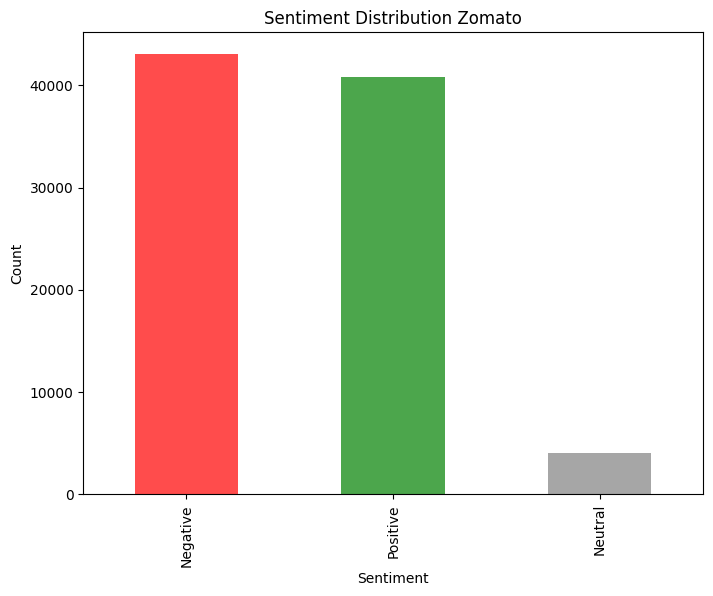

In [ ]:
# Seeing distribution of sentiments - zomato
# Count the occurrences of each value in the "sentiment" column
sentiment_counts_zomato = zomato['sentiment'].value_counts()

# Plot the counts as a bar chart
colors = ['red','green','grey']
plt.figure(figsize=(8, 6))
sentiment_counts_zomato.plot(kind='bar', color = colors, alpha=0.7)

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution Zomato')

# Display the plot
plt.show()

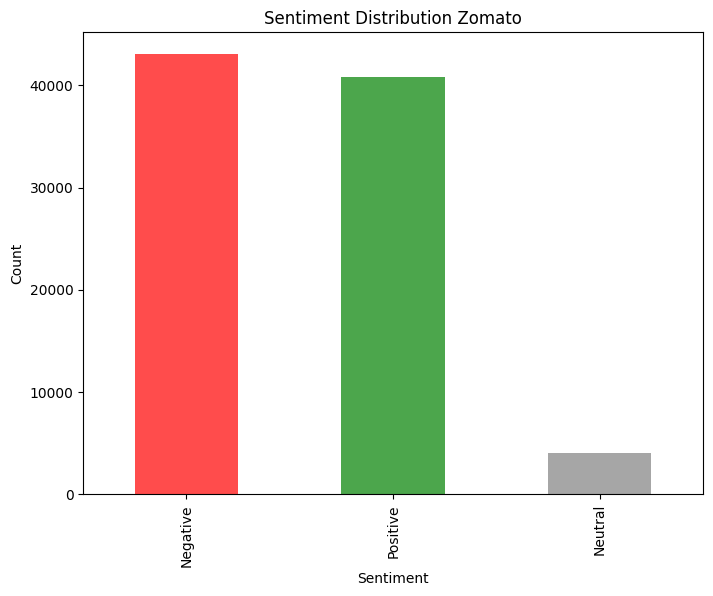

In [ ]:
# Seeing distribution of sentiments - swiggy
# Count the occurrences of each value in the "sentiment" column
sentiment_counts_swiggy = swiggy['sentiment'].value_counts()

# Plot the counts as a bar chart
colors = ['red','green','grey']
plt.figure(figsize=(8, 6))
sentiment_counts_swiggy.plot(kind='bar', color = colors, alpha=0.7)

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution Swiggy')

# Display the plot
plt.show()

## TOPIC MODELING

In [ ]:
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop and len(i) > 1])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    # Remove numbers using regular expression
    normalized = re.sub(r'\d+', '', normalized)
    normalized = " ".join(word for word in normalized.split() if word not in common_words)

    return normalized

In [ ]:
# Importing Gensim
import gensim
from gensim import corpora

In [ ]:
# Tokenizing the review description

zomato["tokenized_review"] = zomato["review_description"].apply(lambda x: x.split())


In [ ]:
# Creating the term dictionary of our courpus, where every unique term is assigned an index.
dictionary = corpora.Dictionary(zomato["tokenized_review"])

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in zomato["tokenized_review"]]

In [ ]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=10, id2word = dictionary, passes=30, alpha = 'auto', eta = 'auto')

In [ ]:
# Tokenizing the review description - swiggy

swiggy["tokenized_review"] = swiggy["review_description"].apply(lambda x: x.split())

In [ ]:
# Creating the term dictionary of our courpus, where every unique term is assigned an index.
dictionary_swiggy = corpora.Dictionary(swiggy["tokenized_review"])

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix_swiggy = [dictionary_swiggy.doc2bow(doc) for doc in swiggy["tokenized_review"]]

In [ ]:
# Creating the object for LDA model using gensim library
Lda_swiggy = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel_swiggy = Lda_swiggy(doc_term_matrix_swiggy, num_topics=10, id2word = dictionary_swiggy, passes=50, alpha = 'auto', eta = 'auto')

In [64]:
for idx, topic in ldamodel_swiggy.print_topics(num_topics=20):
    print(f'Topic {idx}: {topic}')

Topic 0: 0.161*"charg" + 0.087*"price" + 0.072*"high" + 0.036*"rs" + 0.029*"cost" + 0.024*"compar" + 0.023*"extra" + 0.021*"tax" + 0.020*"hotel" + 0.019*"fee"
Topic 1: 0.107*"super" + 0.047*"buy" + 0.042*"free" + 0.041*"membership" + 0.036*"one" + 0.030*"quantiti" + 0.028*"serv" + 0.021*"month" + 0.019*"restur" + 0.018*"plan"
Topic 2: 0.296*"cancel" + 0.061*"awesom" + 0.045*"pm" + 0.036*"pizza" + 0.030*"cake" + 0.021*"cod" + 0.020*"fee" + 0.016*"polici" + 0.013*"without" + 0.009*"automat"
Topic 3: 0.073*"product" + 0.066*"number" + 0.054*"login" + 0.049*"account" + 0.046*"unabl" + 0.020*"instruct" + 0.019*"otp" + 0.017*"id" + 0.017*"old" + 0.016*"log"
Topic 4: 0.160*"servic" + 0.101*"custom" + 0.095*"worst" + 0.076*"veri" + 0.064*"bad" + 0.051*"experi" + 0.030*"care" + 0.030*"support" + 0.024*"pathet" + 0.023*"poor"
Topic 5: 0.176*"app" + 0.133*"food" + 0.094*"good" + 0.041*"use" + 0.036*"zomato" + 0.035*"best" + 0.028*"nice" + 0.027*"fast" + 0.024*"offer" + 0.024*"better"
Topic 6: 0.0